<a href="https://colab.research.google.com/github/nowkoai/nlplot/blob/main/nlplot1207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ①Twitterで指定キーワードの検索結果を収集

In [1]:
import tweepy
import pandas as pd
import datetime

In [2]:
CONSUMER_KEY = "yztgyvy3xyTeSosk943q7bnc6" 
CONSUMER_SECRET = "75vv9XCdcESdxoo4hklsPsXzfrV2nI03zFpyWMkQmPL1VqxmPI"
ACCESS_TOKEN = "47510503-U3D5i7OBgyW4aqXmXmvUSBL7WQj7pTubq16d302tG"
ACCESS_SECRET = "QwEtliGBSz4lC4pEQIjl4gL4zsBrbT6nOgmazVdEEiI5k"

In [3]:
# Twitter APIインスタンス作成
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [4]:
# Twitterの検索キーワード（リツィート、リプライを除く）
q = f"自民党 exclude:retweets -filter:replies"

In [5]:
# Tweetデータを格納するリスト
tweet_data = []

# Tweetデータの取得（ID/ユーザー名/★Tweerデータ/Text/いいね数/リツィート数）
for tweet in tweepy.Cursor(api.search, q=q, result_type='recent',locale="ja",lang="ja",include_entities=False,count=500).items(500):
    tweet_data.append([tweet.id_str,
                       tweet.user.screen_name,
                       tweet.created_at+datetime.timedelta(hours=9),
                       tweet.text.replace('\n',''),
                       tweet.favorite_count,
                       tweet.retweet_count])

In [6]:
# カラムを280文字幅に設定
pd.set_option("display.max_colwidth", 280)

In [7]:
# データ列名
columns_name=["TW_NO","USER_NAME","TW_TIME","TW_TEXT","FAV","RT"]
#データフレーム化
df=pd.DataFrame(tweet_data,columns=columns_name)

In [8]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT
0,1468215565764677637,ry531026,2021-12-07 22:47:23,【誠志郎の書棚★自民党総裁選・・・ハマりすぎやろ。。】岸田ビジョンだけかと思ってたら他の候補者のも揃えてたわ。 https://t.co/KqTC7UdhdS,0,0
1,1468215539072135170,toru_azuma,2021-12-07 22:47:17,落選議員の救済ポスト！？ 内閣官房参与に岸田首相の盟友、石原伸晃氏 弟・宏高氏の「岸田派」入会も背景に 識者「国民納得するか」（夕刊フジ） https://t.co/j8SB04kA4B→ここが自民党のセンスの悪さ。,0,0
2,1468215486567837702,hirata_mituyosi,2021-12-07 22:47:04,都議会本会議が開催、各会派の代表質問が行われた。自民党からは小松大祐政調会長が登壇。感染再拡大や3回目接種に向けた質疑が行われた。都からは「医療提供体制として約9440床、宿泊療養施設約4500室を確保」との答弁に加え、今年10月… https://t.co/cIs9sRAIeK,0,0
3,1468215483342405635,kamidanominomi,2021-12-07 22:47:04,自民党の憲法改正案を知らない人が多い気がします😥衆議院選挙はこの憲法改正案がネックでしたが、野党に投票できなかったのです😓 https://t.co/CX9moy4wjf,0,0
4,1468215449033011201,1216_show,2021-12-07 22:46:55,青山さんガス抜きご苦労さま自民党支持者は簡単ですね。 https://t.co/QNhLigKFWj,1,0
...,...,...,...,...,...,...
495,1468198529235845121,pu5oo,2021-12-07 21:39:41,マスコミの自民党悪玉論に騙されないで戦後の日本を守ってきたのは自民党自民党政権は民主党政権のように日本を潰そうとはしなかった我々日本国民の生命・安全・幸福を護る為我々の日本を護る為に憲法改正を実現し日本を… https://t.co/G8ZSigORWd,0,0
496,1468198499758092288,NEWS_JAPAN_S,2021-12-07 21:39:34,財政政策 首相と高市氏、主導権争いの様相も （産経新聞）財政健全化推進本部役員会で発言する岸田文雄首相＝7日午前、東京・永田町の自民党本部（矢島康弘撮影）政府の財政運営をめぐり、自民党内で財政規律派と積極財政派によるつばぜり合い… https://t.co/9EiFEiqniG,0,0
497,1468198498546110464,otoboke2015,2021-12-07 21:39:34,自民党の議員って、最初は「コイツはダメだろ」ってヤツもいるけど、厳しい勉強会の結果か、きちんとした国家観や使命感そしてしっかりとした知識を伴って（一部例外を除き）立派な国会議員になって活躍するようになる。民主党は普通の人がクズになり、クズはさらにクズになる、いわばクズ製造工場,0,0
498,1468198488773398529,yuuanyaki_MoE,2021-12-07 21:39:32,"選挙で一息ついた感のあった岸田政権に新たな刺客。落選した所を日給26,000円で拾ってやった奴が過去に月60万の経費をくすねてた事が発覚し、自民党全体に大幅なマイナスイメージを植え付ける。小選挙区で落ちるような現職政治家なんて碌なもんじゃないって事が良くわかりますね。",0,0


## ② Twitterデータの前処理

In [9]:
!pip install emoji

In [10]:
# 絵文字を削除
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)


# ツイートを整形する（不要な文字を削除する！）
# 形態素解析する前に、必要に応じて追記
def format_df_text(text_col,df):
    df['temp'] = df[text_col].replace(r'https?://[w/:%#$&?()~.=+-…]+', '', regex=True) #画像へのリンクを削除
    df['temp'] = df['temp'].replace(r'@[w/:%#$&?()~.=+-…]+', '', regex=True) #'@'によるメンションを削除
    df['temp'] = df['temp'].replace(r'#(\w+)', '', regex=True) #ハッシュタグ(半角)を削除
    df['temp'] = df['temp'].replace(r'＃(\w+)', '', regex=True) #ハッシュタグ(全角)を削除
    df['temp'] = df['temp'].apply(lambda x: remove_emoji(x)) #🐶のような絵文字を削除
    
    return df['temp']

In [11]:
# Tweetデータの前処理
df['TW_TEXT_mod'] = format_df_text('TW_TEXT',df)

In [12]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT,temp,TW_TEXT_mod
0,1468215565764677637,ry531026,2021-12-07 22:47:23,【誠志郎の書棚★自民党総裁選・・・ハマりすぎやろ。。】岸田ビジョンだけかと思ってたら他の候補者のも揃えてたわ。 https://t.co/KqTC7UdhdS,0,0,【誠志郎の書棚★自民党総裁選・・・ハマりすぎやろ。。】岸田ビジョンだけかと思ってたら他の候補者のも揃えてたわ。,【誠志郎の書棚★自民党総裁選・・・ハマりすぎやろ。。】岸田ビジョンだけかと思ってたら他の候補者のも揃えてたわ。
1,1468215539072135170,toru_azuma,2021-12-07 22:47:17,落選議員の救済ポスト！？ 内閣官房参与に岸田首相の盟友、石原伸晃氏 弟・宏高氏の「岸田派」入会も背景に 識者「国民納得するか」（夕刊フジ） https://t.co/j8SB04kA4B→ここが自民党のセンスの悪さ。,0,0,落選議員の救済ポスト！？ 内閣官房参与に岸田首相の盟友、石原伸晃氏 弟・宏高氏の「岸田派」入会も背景に 識者「国民納得するか」（夕刊フジ） →ここが自民党のセンスの悪さ。,落選議員の救済ポスト！？ 内閣官房参与に岸田首相の盟友、石原伸晃氏 弟・宏高氏の「岸田派」入会も背景に 識者「国民納得するか」（夕刊フジ） →ここが自民党のセンスの悪さ。
2,1468215486567837702,hirata_mituyosi,2021-12-07 22:47:04,都議会本会議が開催、各会派の代表質問が行われた。自民党からは小松大祐政調会長が登壇。感染再拡大や3回目接種に向けた質疑が行われた。都からは「医療提供体制として約9440床、宿泊療養施設約4500室を確保」との答弁に加え、今年10月… https://t.co/cIs9sRAIeK,0,0,都議会本会議が開催、各会派の代表質問が行われた。自民党からは小松大祐政調会長が登壇。感染再拡大や3回目接種に向けた質疑が行われた。都からは「医療提供体制として約9440床、宿泊療養施設約4500室を確保」との答弁に加え、今年10月…,都議会本会議が開催、各会派の代表質問が行われた。自民党からは小松大祐政調会長が登壇。感染再拡大や3回目接種に向けた質疑が行われた。都からは「医療提供体制として約9440床、宿泊療養施設約4500室を確保」との答弁に加え、今年10月…
3,1468215483342405635,kamidanominomi,2021-12-07 22:47:04,自民党の憲法改正案を知らない人が多い気がします😥衆議院選挙はこの憲法改正案がネックでしたが、野党に投票できなかったのです😓 https://t.co/CX9moy4wjf,0,0,自民党の憲法改正案を知らない人が多い気がします衆議院選挙はこの憲法改正案がネックでしたが、野党に投票できなかったのです,自民党の憲法改正案を知らない人が多い気がします衆議院選挙はこの憲法改正案がネックでしたが、野党に投票できなかったのです
4,1468215449033011201,1216_show,2021-12-07 22:46:55,青山さんガス抜きご苦労さま自民党支持者は簡単ですね。 https://t.co/QNhLigKFWj,1,0,青山さんガス抜きご苦労さま自民党支持者は簡単ですね。,青山さんガス抜きご苦労さま自民党支持者は簡単ですね。
...,...,...,...,...,...,...,...,...
495,1468198529235845121,pu5oo,2021-12-07 21:39:41,マスコミの自民党悪玉論に騙されないで戦後の日本を守ってきたのは自民党自民党政権は民主党政権のように日本を潰そうとはしなかった我々日本国民の生命・安全・幸福を護る為我々の日本を護る為に憲法改正を実現し日本を… https://t.co/G8ZSigORWd,0,0,マスコミの自民党悪玉論に騙されないで戦後の日本を守ってきたのは自民党自民党政権は民主党政権のように日本を潰そうとはしなかった我々日本国民の生命・安全・幸福を護る為我々の日本を護る為に憲法改正を実現し日本を…,マスコミの自民党悪玉論に騙されないで戦後の日本を守ってきたのは自民党自民党政権は民主党政権のように日本を潰そうとはしなかった我々日本国民の生命・安全・幸福を護る為我々の日本を護る為に憲法改正を実現し日本を…
496,1468198499758092288,NEWS_JAPAN_S,2021-12-07 21:39:34,財政政策 首相と高市氏、主導権争いの様相も （産経新聞）財政健全化推進本部役員会で発言する岸田文雄首相＝7日午前、東京・永田町の自民党本部（矢島康弘撮影）政府の財政運営をめぐり、自民党内で財政規律派と積極財政派によるつばぜり合い… https://t.co/9EiFEiqniG,0,0,財政政策 首相と高市氏、主導権争いの様相も （産経新聞）財政健全化推進本部役員会で発言する岸田文雄首相＝7日午前、東京・永田町の自民党本部（矢島康弘撮影）政府の財政運営をめぐり、自民党内で財政規律派と積極財政派によるつばぜり合い…,財政政策 首相と高市氏、主導権争いの様相も （産経新聞）財政健全化推進本部役員会で発言する岸田文雄首相＝7日午前、東京・永田町の自民党本部（矢島康弘撮影）政府の財政運営をめぐり、自民党内で財政規律派と積極財政派によるつばぜり合い…
497,1468198498546110464,otoboke2015,2021-12-07 21:39:34,自民党の議員って、最初は「コイツはダメだろ」ってヤツもいるけど、厳しい勉強会の結果か、きちんとした国家観や使命感そしてしっかりとした知識を伴って（一部例外を除き）立派な国会議員になって活躍するようになる。民主党は普通の人がクズになり、クズはさらにクズになる、いわばクズ製造工場,0,0,自民党の議員って、最初は「コイツはダメだろ」ってヤツもいるけど、厳しい勉強会の結果か、きちんとした国家観や使命感そしてしっかりとした知識を伴って（一部例外を除き）立派な国会議員になって活躍するようになる。民主党は普通の人がクズになり、クズはさらにクズになる、いわばクズ製造工場,自民党の議員って、最初は「コイツはダメだろ」ってヤツもいるけど、厳しい勉強会の結果か、きちんとした国家観や使命感そしてしっかりとした知識を伴って（一部例外を除き）立派な国会議員になって活躍するようになる。民主党は普通の人がクズになり、クズはさらにクズになる、いわばクズ製造工場
498,1468198488773398529,yuuanyaki_MoE,2021-12-07 21:39:32,"選挙で一息ついた感のあった岸田政権に新たな刺客。落選した所を日給26,000円で拾ってやった奴が過去に月60万の経費をくすねてた事が発覚し、自民党全体に大幅なマイナスイメージを植え付ける。小選挙区で落ちるような現職政治家なんて碌なもんじゃないって事が良くわかりますね。",0,0,"選挙で一息ついた感のあった岸田政権に新たな刺客。落選した所を日給26,000円で拾ってやった奴が過去に月60万の経費をくすねてた事が発覚し、自民党全体に大幅なマイナスイメージを植え付ける。小選挙区で落ちるような現職政治家なんて碌なもんじゃないって事が良くわかりますね。","選挙で一息ついた感のあった岸田政権に新たな刺客。落選した所を日給26,000円で拾ってやった奴が過去に月60万の経費をくすねてた事が発覚し、自民党全体に大幅なマイナスイメージを植え付ける。小選挙区で落ちるような現職政治家なんて碌なもんじゃないって事が良くわかりますね。"


In [13]:
df2 = df.drop(["TW_NO", "USER_NAME", "TW_TIME", "FAV", "RT", "temp"], axis=1)

In [14]:
df2

,TW_TEXT,TW_TEXT_mod
0,【誠志郎の書棚★自民党総裁選・・・ハマりすぎやろ。。】岸田ビジョンだけかと思ってたら他の候補者のも揃えてたわ。 https://t.co/KqTC7UdhdS,【誠志郎の書棚★自民党総裁選・・・ハマりすぎやろ。。】岸田ビジョンだけかと思ってたら他の候補者のも揃えてたわ。
1,落選議員の救済ポスト！？ 内閣官房参与に岸田首相の盟友、石原伸晃氏 弟・宏高氏の「岸田派」入会も背景に 識者「国民納得するか」（夕刊フジ） https://t.co/j8SB04kA4B→ここが自民党のセンスの悪さ。,落選議員の救済ポスト！？ 内閣官房参与に岸田首相の盟友、石原伸晃氏 弟・宏高氏の「岸田派」入会も背景に 識者「国民納得するか」（夕刊フジ） →ここが自民党のセンスの悪さ。
2,都議会本会議が開催、各会派の代表質問が行われた。自民党からは小松大祐政調会長が登壇。感染再拡大や3回目接種に向けた質疑が行われた。都からは「医療提供体制として約9440床、宿泊療養施設約4500室を確保」との答弁に加え、今年10月… https://t.co/cIs9sRAIeK,都議会本会議が開催、各会派の代表質問が行われた。自民党からは小松大祐政調会長が登壇。感染再拡大や3回目接種に向けた質疑が行われた。都からは「医療提供体制として約9440床、宿泊療養施設約4500室を確保」との答弁に加え、今年10月…
3,自民党の憲法改正案を知らない人が多い気がします😥衆議院選挙はこの憲法改正案がネックでしたが、野党に投票できなかったのです😓 https://t.co/CX9moy4wjf,自民党の憲法改正案を知らない人が多い気がします衆議院選挙はこの憲法改正案がネックでしたが、野党に投票できなかったのです
4,青山さんガス抜きご苦労さま自民党支持者は簡単ですね。 https://t.co/QNhLigKFWj,青山さんガス抜きご苦労さま自民党支持者は簡単ですね。
...,...,...
495,マスコミの自民党悪玉論に騙されないで戦後の日本を守ってきたのは自民党自民党政権は民主党政権のように日本を潰そうとはしなかった我々日本国民の生命・安全・幸福を護る為我々の日本を護る為に憲法改正を実現し日本を… https://t.co/G8ZSigORWd,マスコミの自民党悪玉論に騙されないで戦後の日本を守ってきたのは自民党自民党政権は民主党政権のように日本を潰そうとはしなかった我々日本国民の生命・安全・幸福を護る為我々の日本を護る為に憲法改正を実現し日本を…
496,財政政策 首相と高市氏、主導権争いの様相も （産経新聞）財政健全化推進本部役員会で発言する岸田文雄首相＝7日午前、東京・永田町の自民党本部（矢島康弘撮影）政府の財政運営をめぐり、自民党内で財政規律派と積極財政派によるつばぜり合い… https://t.co/9EiFEiqniG,財政政策 首相と高市氏、主導権争いの様相も （産経新聞）財政健全化推進本部役員会で発言する岸田文雄首相＝7日午前、東京・永田町の自民党本部（矢島康弘撮影）政府の財政運営をめぐり、自民党内で財政規律派と積極財政派によるつばぜり合い…
497,自民党の議員って、最初は「コイツはダメだろ」ってヤツもいるけど、厳しい勉強会の結果か、きちんとした国家観や使命感そしてしっかりとした知識を伴って（一部例外を除き）立派な国会議員になって活躍するようになる。民主党は普通の人がクズになり、クズはさらにクズになる、いわばクズ製造工場,自民党の議員って、最初は「コイツはダメだろ」ってヤツもいるけど、厳しい勉強会の結果か、きちんとした国家観や使命感そしてしっかりとした知識を伴って（一部例外を除き）立派な国会議員になって活躍するようになる。民主党は普通の人がクズになり、クズはさらにクズになる、いわばクズ製造工場
498,"選挙で一息ついた感のあった岸田政権に新たな刺客。落選した所を日給26,000円で拾ってやった奴が過去に月60万の経費をくすねてた事が発覚し、自民党全体に大幅なマイナスイメージを植え付ける。小選挙区で落ちるような現職政治家なんて碌なもんじゃないって事が良くわかりますね。","選挙で一息ついた感のあった岸田政権に新たな刺客。落選した所を日給26,000円で拾ってやった奴が過去に月60万の経費をくすねてた事が発覚し、自民党全体に大幅なマイナスイメージを植え付ける。小選挙区で落ちるような現職政治家なんて碌なもんじゃないって事が良くわかりますね。"


## ③ Twitterデータを形態素解析/Mecab

In [27]:
# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

fatal: destination path 'mecab-ipadic-neologd' already exists and is not an empty directory.
ln: failed to create symbolic link '/usr/local/etc/mecabrc': File exists


In [28]:
# 辞書のパスの確認
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [31]:
import MeCab

#MeCabのインスタンスを作成（辞書はmecab-ipadic-neologdを使用）
# mecab = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
mecab = MeCab.Tagger()

In [32]:
def mecab_text(text):
    
    #形態素解析
    node = mecab.parseToNode(text)
    
    #形態素解析した結果を格納するリスト
    wordlist = []
    
    while node:
        #名詞のみリストに格納する
        if node.feature.split(',')[0] == '名詞':
            wordlist.append(node.surface)
        #他の品詞を取得したければ、elifで追加する
        #elif node.feature.split(',')[0] == '形容詞':
        #    wordlist.append(node.surface)
        node = node.next
    return wordlist

In [33]:
#形態素結果をリスト化し、データフレームdf1に結果を列追加する
df2['words'] = df2['TW_TEXT_mod'].apply(mecab_text)

In [34]:
df2

,TW_TEXT,TW_TEXT_mod,words
0,【誠志郎の書棚★自民党総裁選・・・ハマりすぎやろ。。】岸田ビジョンだけかと思ってたら他の候補者のも揃えてたわ。 https://t.co/KqTC7UdhdS,【誠志郎の書棚★自民党総裁選・・・ハマりすぎやろ。。】岸田ビジョンだけかと思ってたら他の候補者のも揃えてたわ。,"[誠志郎, 書棚, 自民党, 総裁, 選, 岸田, ビジョン, 他, 候補, 者, の]"
1,落選議員の救済ポスト！？ 内閣官房参与に岸田首相の盟友、石原伸晃氏 弟・宏高氏の「岸田派」入会も背景に 識者「国民納得するか」（夕刊フジ） https://t.co/j8SB04kA4B→ここが自民党のセンスの悪さ。,落選議員の救済ポスト！？ 内閣官房参与に岸田首相の盟友、石原伸晃氏 弟・宏高氏の「岸田派」入会も背景に 識者「国民納得するか」（夕刊フジ） →ここが自民党のセンスの悪さ。,"[落選, 議員, 救済, ポスト, 内閣, 官房, 参与, 岸田, 首相, 盟友, 石原, 伸晃, 氏, 弟, 宏, 高, 氏, 岸田, 派, 入会, 背景, 識者, 国民, 納得, 夕刊, フジ, ここ, 自民党, センス, さ]"
2,都議会本会議が開催、各会派の代表質問が行われた。自民党からは小松大祐政調会長が登壇。感染再拡大や3回目接種に向けた質疑が行われた。都からは「医療提供体制として約9440床、宿泊療養施設約4500室を確保」との答弁に加え、今年10月… https://t.co/cIs9sRAIeK,都議会本会議が開催、各会派の代表質問が行われた。自民党からは小松大祐政調会長が登壇。感染再拡大や3回目接種に向けた質疑が行われた。都からは「医療提供体制として約9440床、宿泊療養施設約4500室を確保」との答弁に加え、今年10月…,"[都議会, 会議, 開催, 会派, 代表, 質問, 自民党, 小松, 祐, 政調, 会長, 登壇, 感染, 拡大, 3, 回, 目, 接種, 質疑, 都, 医療, 提供, 体制, 9440, 床, 宿泊, 療養, 施設, 4500, 室, 確保, 答弁, 今年, 10, 月]"
3,自民党の憲法改正案を知らない人が多い気がします😥衆議院選挙はこの憲法改正案がネックでしたが、野党に投票できなかったのです😓 https://t.co/CX9moy4wjf,自民党の憲法改正案を知らない人が多い気がします衆議院選挙はこの憲法改正案がネックでしたが、野党に投票できなかったのです,"[自民党, 憲法, 改正, 案, 人, 気, 衆議院, 選挙, 憲法, 改正, 案, ネック, 野党, 投票, の]"
4,青山さんガス抜きご苦労さま自民党支持者は簡単ですね。 https://t.co/QNhLigKFWj,青山さんガス抜きご苦労さま自民党支持者は簡単ですね。,"[青山, さん, ガス, 抜き, 自民党, 支持, 者, 簡単]"
...,...,...,...
495,マスコミの自民党悪玉論に騙されないで戦後の日本を守ってきたのは自民党自民党政権は民主党政権のように日本を潰そうとはしなかった我々日本国民の生命・安全・幸福を護る為我々の日本を護る為に憲法改正を実現し日本を… https://t.co/G8ZSigORWd,マスコミの自民党悪玉論に騙されないで戦後の日本を守ってきたのは自民党自民党政権は民主党政権のように日本を潰そうとはしなかった我々日本国民の生命・安全・幸福を護る為我々の日本を護る為に憲法改正を実現し日本を…,"[マスコミ, 自民党, 悪玉, 論, 戦後, 日本, の, 自民党, 自民党, 政権, 民主党, 政権, よう, 日本, 我々, 日本, 国民, 生命, 安全, 幸福, 為, 我々, 日本, 為, 憲法, 改正, 実現, 日本]"
496,財政政策 首相と高市氏、主導権争いの様相も （産経新聞）財政健全化推進本部役員会で発言する岸田文雄首相＝7日午前、東京・永田町の自民党本部（矢島康弘撮影）政府の財政運営をめぐり、自民党内で財政規律派と積極財政派によるつばぜり合い… https://t.co/9EiFEiqniG,財政政策 首相と高市氏、主導権争いの様相も （産経新聞）財政健全化推進本部役員会で発言する岸田文雄首相＝7日午前、東京・永田町の自民党本部（矢島康弘撮影）政府の財政運営をめぐり、自民党内で財政規律派と積極財政派によるつばぜり合い…,"[財政, 政策, 首相, 高市, 氏, 主導, 権, 争い, 様相, 産経新聞, 財政, 健全, 化, 推進, 本部, 役員, 会, 発言, 岸田, 文雄, 首相, 7, 日, 午前, 東京, 永田町, 自民党, 本部, 矢島, 康弘, 撮影, 政府, 財政, 運営, 自民党, 内, 財政, 規律, 派, 積極, 財政, 派, つばぜり合い]"
497,自民党の議員って、最初は「コイツはダメだろ」ってヤツもいるけど、厳しい勉強会の結果か、きちんとした国家観や使命感そしてしっかりとした知識を伴って（一部例外を除き）立派な国会議員になって活躍するようになる。民主党は普通の人がクズになり、クズはさらにクズになる、いわばクズ製造工場,自民党の議員って、最初は「コイツはダメだろ」ってヤツもいるけど、厳しい勉強会の結果か、きちんとした国家観や使命感そしてしっかりとした知識を伴って（一部例外を除き）立派な国会議員になって活躍するようになる。民主党は普通の人がクズになり、クズはさらにクズになる、いわばクズ製造工場,"[自民党, 議員, 最初, コイツ, ダメ, ヤツ, 勉強, 会, 結果, 国家, 観, 使命, 感, 知識, 一部, 例外, 立派, 国会, 議員, 活躍, よう, 民主党, 普通, 人, クズ, クズ, クズ, クズ, 製造, 工場]"
498,"選挙で一息ついた感のあった岸田政権に新たな刺客。落選した所を日給26,000円で拾ってやった奴が過去に月60万の経費をくすねてた事が発覚し、自民党全体に大幅なマイナスイメージを植え付ける。小選挙区で落ちるような現職政治家なんて碌なもんじゃないって事が良くわかりますね。","選挙で一息ついた感のあった岸田政権に新たな刺客。落選した所を日給26,000円で拾ってやった奴が過去に月60万の経費をくすねてた事が発覚し、自民党全体に大幅なマイナスイメージを植え付ける。小選挙区で落ちるような現職政治家なんて碌なもんじゃないって事が良くわかりますね。","[選挙, 一息, 感, 岸田, 政権, 新た, 刺客, 落選, 所, 日給, 26, ,, 000, 円, 奴, 過去, 月, 60, 万, 経費, 事, 発覚, 自民党, 全体, 大幅, マイナス, イメージ, 選挙, 区, よう, 現職, 政治, 家, 碌, もん, 事]"


## ④ nlplotを使ってみる

In [35]:
# nlplotのインストール
!pip install nlplot

     |████████████████████████████████| 967 kB 5.0 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [36]:
import nlplot

In [37]:
# nlplotのインスタンスを生成
npt = nlplot.NLPlot(df2, target_col='words')

In [38]:
# ストップワードの計算
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# 今回は上位2単語（データサイエンティスト・kaggle）をストップワードに指定
# stopwords = npt.get_stopword(top_n=2, min_freq=0)

# 初回は、ストップワーズは設定なし（チャートをチェックして追加する方針）
stopwords = npt.get_stopword(top_n=0, min_freq=0)

## N-gram bar chart

In [41]:
# ngramの引数に与える数値により、いくつ隣り合わせの単語までを考慮するかを指定できる
npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,  #1の場合
    top_n=50,
    stopwords=stopwords,
)

100%|██████████| 500/500 [00:00<00:00, 61429.80it/s]


In [42]:
# ngramの引数に与える数値により、いくつ隣り合わせの単語までを考慮するかを指定できる
npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,  #2の場合
    top_n=50,
    stopwords=stopwords,
)

100%|██████████| 500/500 [00:00<00:00, 43028.21it/s]


## N-gram tree Map

In [45]:
npt.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    stopwords=stopwords,
)

100%|██████████| 500/500 [00:00<00:00, 37321.85it/s]


## Histogram of the word count

In [46]:
# 単語の出現頻度のヒストグラム

# 単語数の分布
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

## wordcloud

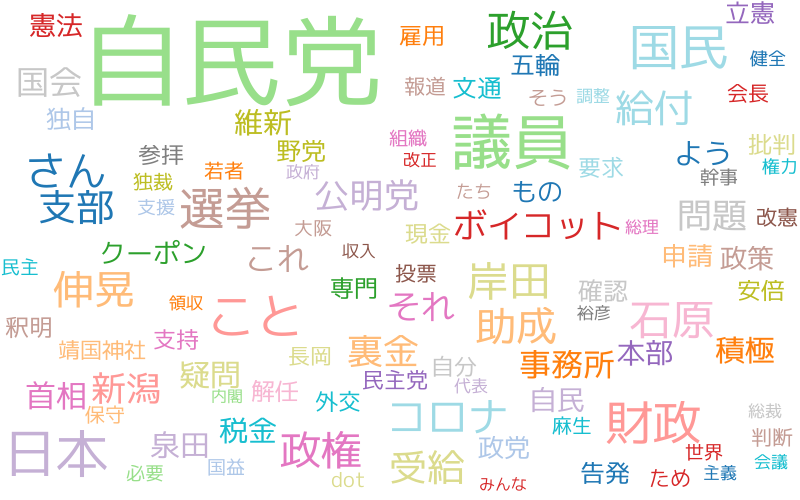

In [47]:
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
)

## co-occurrence networks（共起ネットワーク）

- このネットワークを描画する場合は、事前にビルド処理が必要
- このビルド処理のmin_edge_frequency引数でプロットするノードの数を制限<br />
（指定数以下のエッジ(辺)しか存在しないノードはプロット対象から除外することができます）

In [49]:
# ビルド（データ件数によっては処理に時間を要します）※ノードの数のみ変更
npt.build_graph(stopwords=stopwords, min_edge_frequency=10)

node_size:128, edge_size:459


In [50]:
display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

,id,id_code,adjacency_frequency,betweeness_centrality,clustering_coefficient,community
0,費,0,7,0.002332,0.809524,4
1,釈明,1,19,0.000000,1.000000,2
2,2,2,1,0.000000,0.000000,0
3,申請,3,19,0.000000,1.000000,2
4,必要,4,1,0.000000,0.000000,0


(128, 6)

,source,target,edge_frequency,source_code,target_code
0,の,自民党,119,113,41
1,自民党,議員,78,41,8
2,ん,自民党,63,112,41
3,国民,自民党,57,78,41
4,円,自民党,57,17,41


(459, 5)

In [51]:
# nlplotで共起グラフを作成
npt.co_network(
    title='Co-occurrence network',
)